In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time
import scipy as sp
from scipy.interpolate import interp1d
from datetime import datetime

In [4]:
table = np.loadtxt("therm44008_table.txt")
tempfun = sp.interpolate.interp1d(table[:,1], table[:,0], kind='cubic')

In [22]:
def volt_to_kohm(volt):
    return 20 * volt / (2.5 - volt)

def rms(SPS, times, volts, temps):
    SPS_int = int(SPS/2)*2
    volts_avs = np.array([np.mean(volts[i:i+SPS_int]) for i in range(0, len(times)-SPS_int)])
    temps_avs = np.array([np.mean(temps[i:i+SPS_int]) for i in range(0, len(times)-SPS_int)])
    Trms_arr = (temps[int(SPS_int/2):-int(SPS_int/2)] - temps_avs)**2
    Vrms_arr = (volts[int(SPS_int/2):-int(SPS_int/2)] - volts_avs)**2
    Trms = np.sqrt(np.sum(Trms_arr)/len(Trms_arr))
    Vrms = np.sqrt(np.sum(Vrms_arr)/len(Vrms_arr))
    
    return Trms, Vrms

def analyze(FW, SPS, channel=0, versionstr=""):
    print(f"Loading multidata_adc_filter{FW}{versionstr}.txt")
    data = None
    if channel == 0:
        data = np.loadtxt(f"multidata_adc_filter{FW}{versionstr}.txt")[:,[0,1]]
    elif channel == 1:
        data = np.loadtxt(f"multidata_adc_filter{FW}{versionstr}.txt")[:,[2,3]]
    else:
        print("Invalid channel selection, must be 0 or 1")
        return
    kohms = [volt_to_kohm(v) for v in data[:,1]]
    temps = [tempfun(kohm) for kohm in kohms]
    print(f"Loaded {len(data)} Datapoints")
    
    TSPS = len(data) / (data[-1,0]-data[0,0])
    print(f"TSPS: {TSPS}")    
    Trms, Vrms = rms(min(SPS,TSPS), data[:,0], data[:,1], temps)
    print(f"V RMS: {Vrms} V")
    print(f"T RMS: {Trms} K")
    
    fig,axs = plt.subplots(2,1,figsize=(14,25))
    dt_obj = datetime.fromtimestamp(data[0,0])
    axs[0].plot(data[:,0]-data[0,0], data[:,1], '*', ms=2)
    axs[0].set_title(f"ADC Output starting at {dt_obj} (Filterword {FW}) Ch {channel}", fontsize=18)
    axs[0].set_ylabel("Voltage measured [V]", fontsize=15)
    axs[0].set_xlabel("Time since start [s]", fontsize=15)
    textstr = f"TSPS: {TSPS:.5}\nVrms: {Vrms*1000000:.5} uV"
    axs[0].text(0.7, 0.5, textstr, transform=axs[0].transAxes, fontsize=20, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.4))
    maxy = np.max(data[:,1])
    miny = np.min(data[:,1])
    gridy = np.linspace(miny, maxy, int((maxy-miny)/0.000001), endpoint=True) #1uV spacing
    for y in gridy:
        axs[0].plot([0, data[-1,0]-data[0,0]], [y,y], lw=1, c='gray', alpha=0.15)
    
    axs[1].plot(data[:,0]-data[0,0], temps[:], '*', ms=2, c='g')
    axs[1].set_title(f"ADC Temperature starting at {dt_obj} (Filterword {FW}) Ch {channel}", fontsize=18)
    axs[1].set_ylabel("Temperature measured [°C]", fontsize=15)
    axs[1].set_xlabel("Time since start [s]", fontsize=15)
    textstr = f"TSPS: {TSPS:.5}\nTrms: {Trms*1000000:.5} uK"
    axs[1].text(0.7, 0.5, textstr, transform=axs[1].transAxes, fontsize=20, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.4))
    maxy = np.max(temps[:])
    miny = np.min(temps[:])
    gridy = np.linspace(miny, maxy, int((maxy-miny)/0.00003), endpoint=True) #30uK spacing
    for y in gridy:
        axs[1].plot([0, data[-1,0]-data[0,0]], [y,y], lw=1, c='gray', alpha=0.15)    
    plt.show()

Loading multidata_adc_filter2047_v0.txt
Loaded 1200 Datapoints
TSPS: 18.80070231266953
V RMS: 3.999027860876442e-06 V
T RMS: 0.00015598252813740183 K


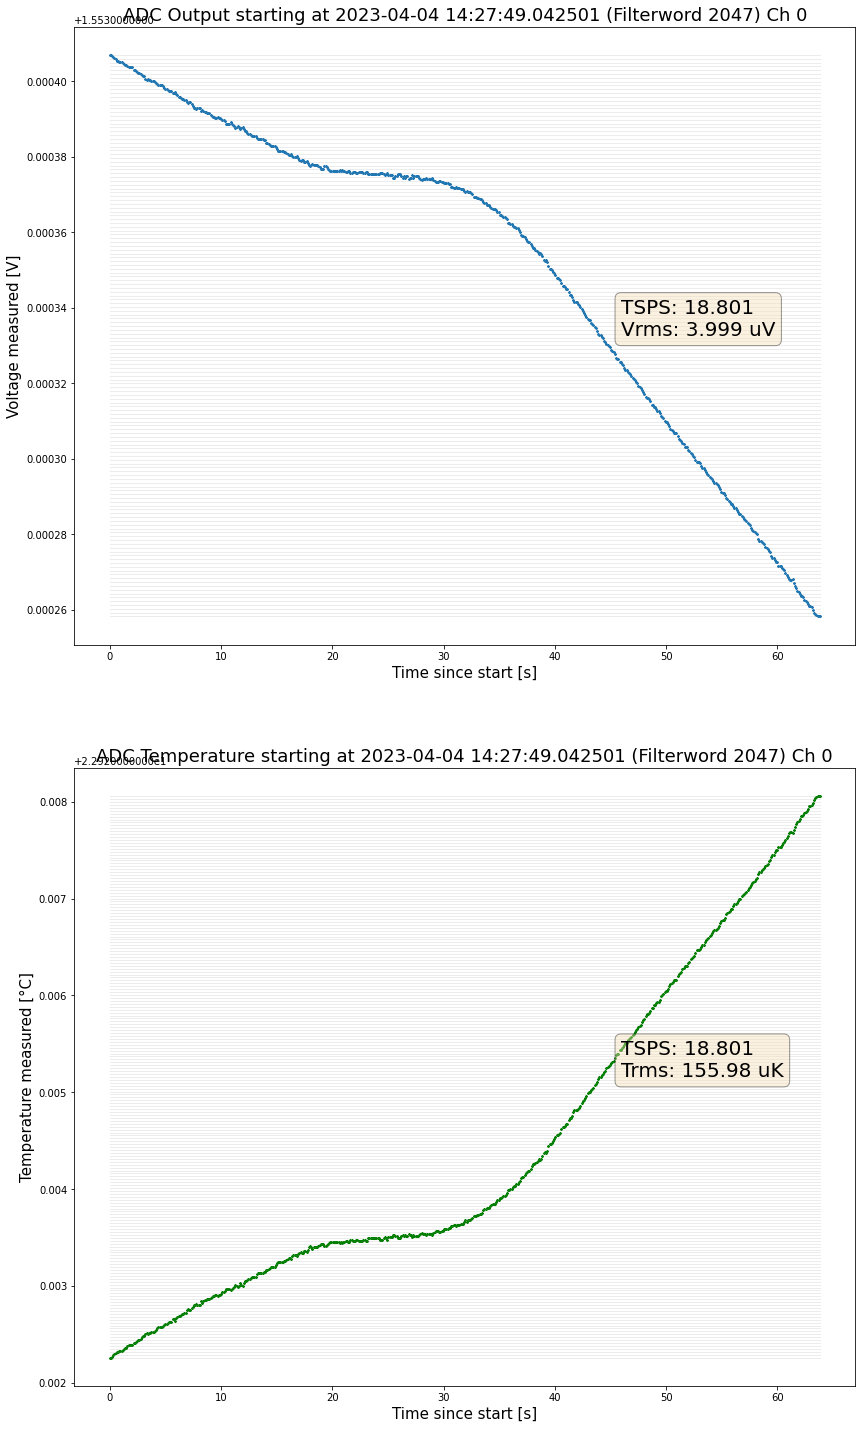

In [23]:
analyze(2047,10,0,"_v0")

Loading multidata_adc_filter2047_v0.txt
Loaded 1200 Datapoints
TSPS: 18.823560809371504
V RMS: 2.7596713635138326e-06 V
T RMS: 0.00010753813949310385 K


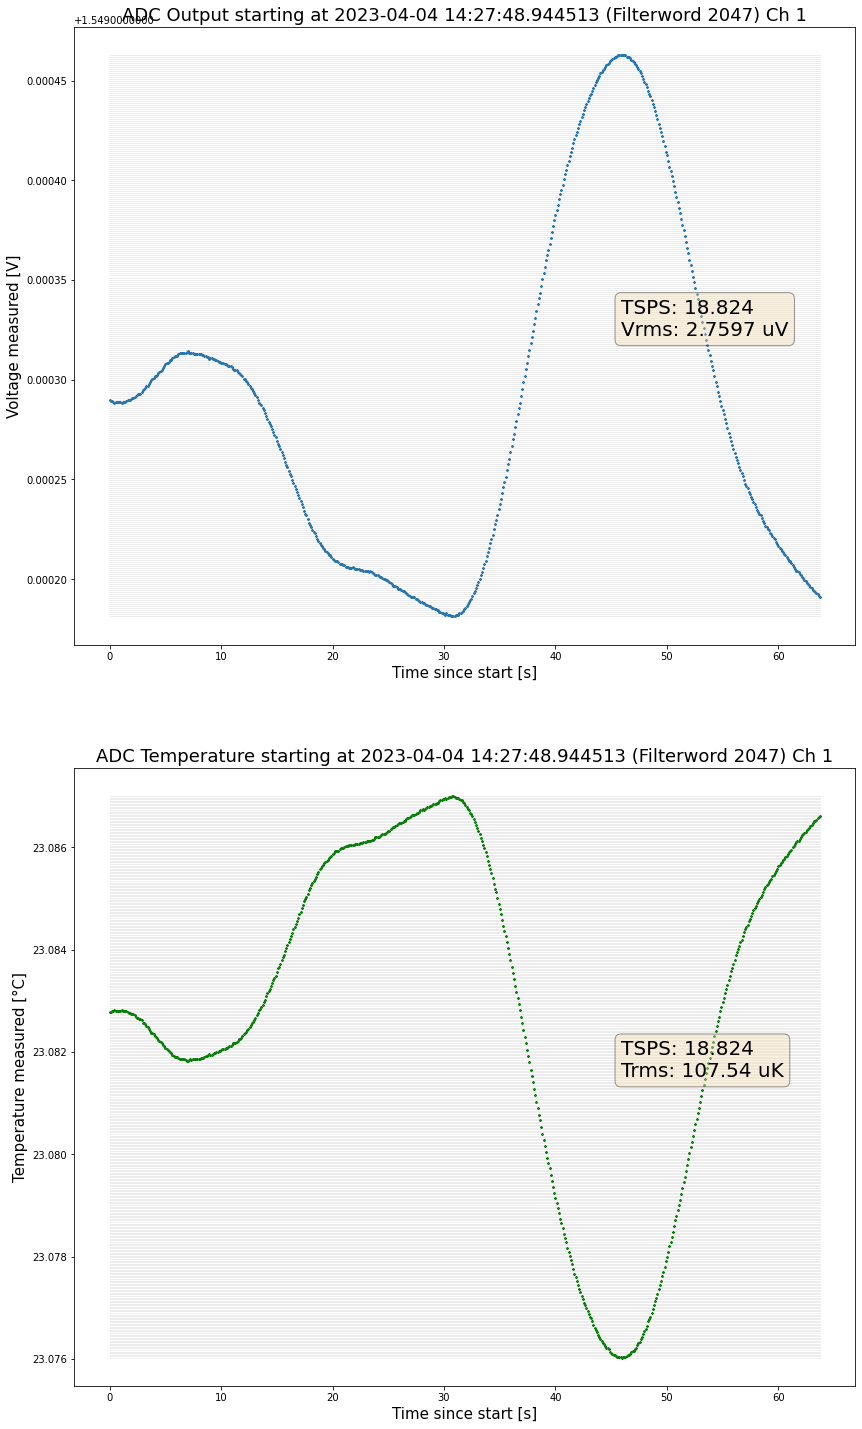

In [24]:
analyze(2047,10,1,"_v0")

Loading multidata_adc_filter2047_v1.txt
Loaded 600 Datapoints
TSPS: 9.401649174219276
V RMS: 2.338704104287083e-07 V
T RMS: 9.121321688658343e-06 K


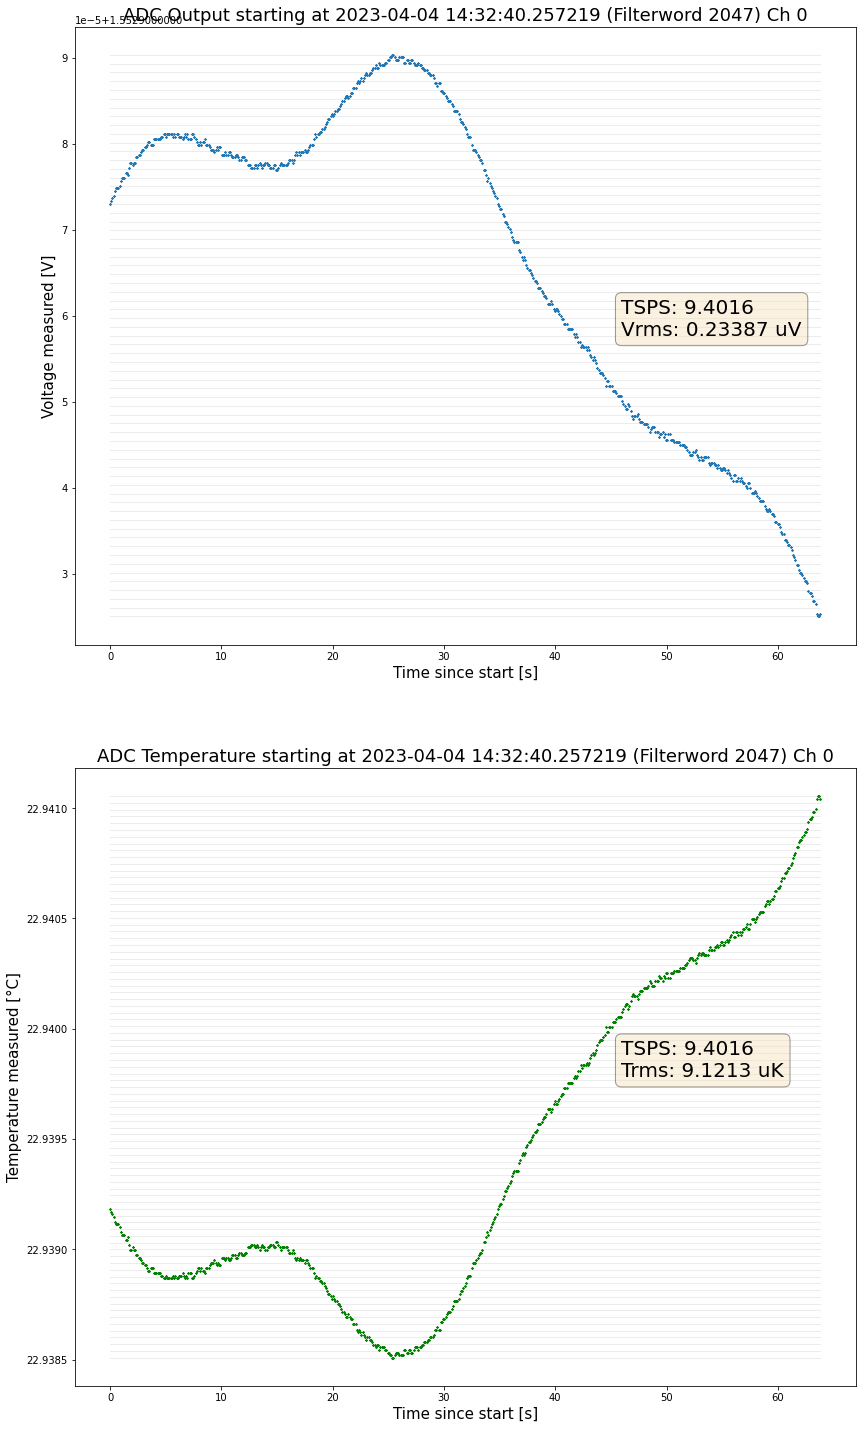

In [25]:
analyze(2047,10,0,"_v1")

Loading multidata_adc_filter2047_v1.txt
Loaded 600 Datapoints
TSPS: 9.411862419465296
V RMS: 8.520374381070969e-07 V
T RMS: 3.3199437116896395e-05 K


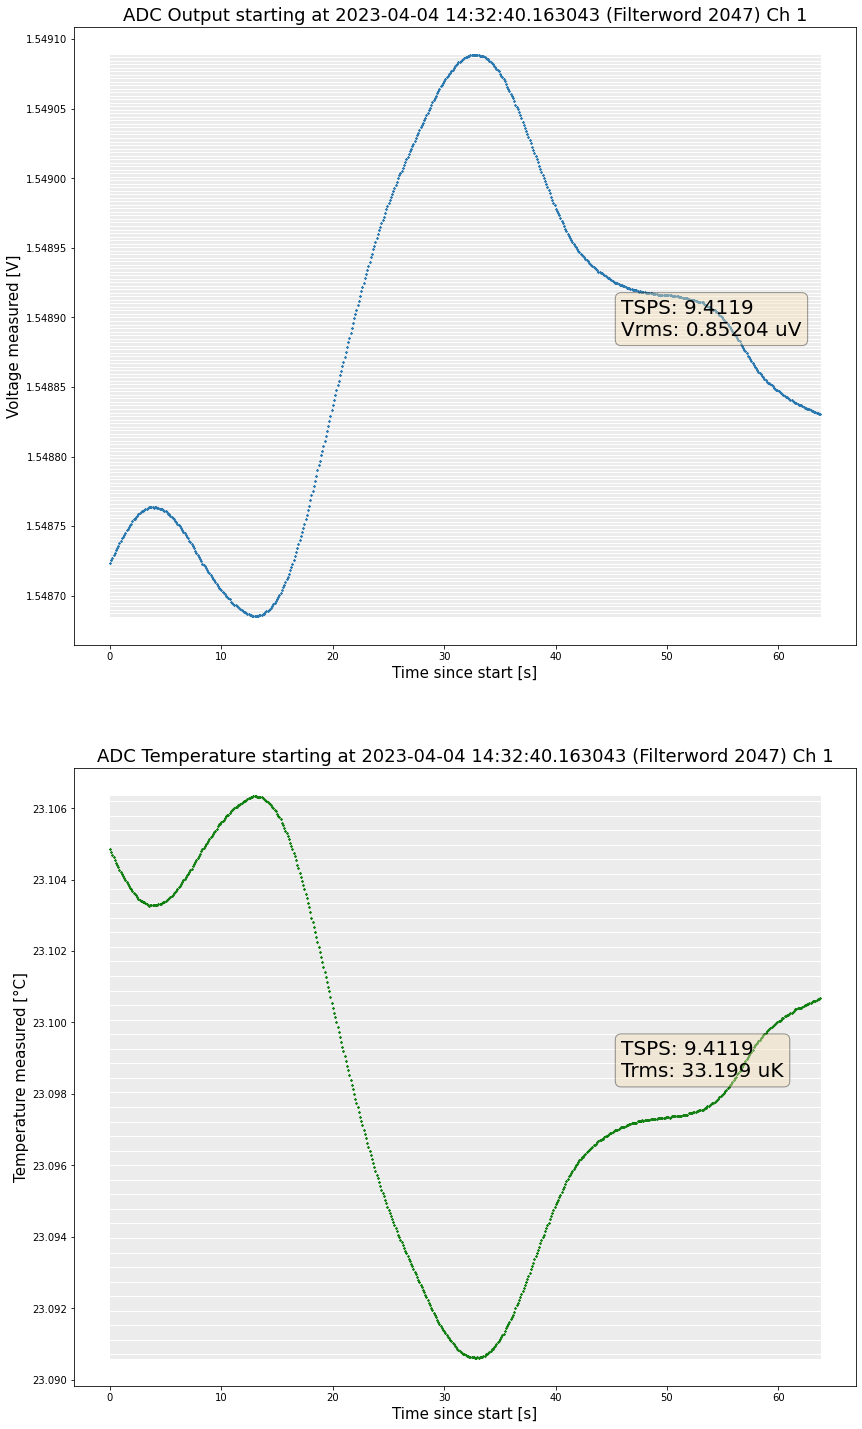

In [26]:
analyze(2047,10,1,"_v1")

Loading multidata_adc_filter2047_v2.txt
Loaded 18000 Datapoints
TSPS: 9.384741418578916
V RMS: 2.678641931849535e-07 V
T RMS: 1.0440158727510856e-05 K


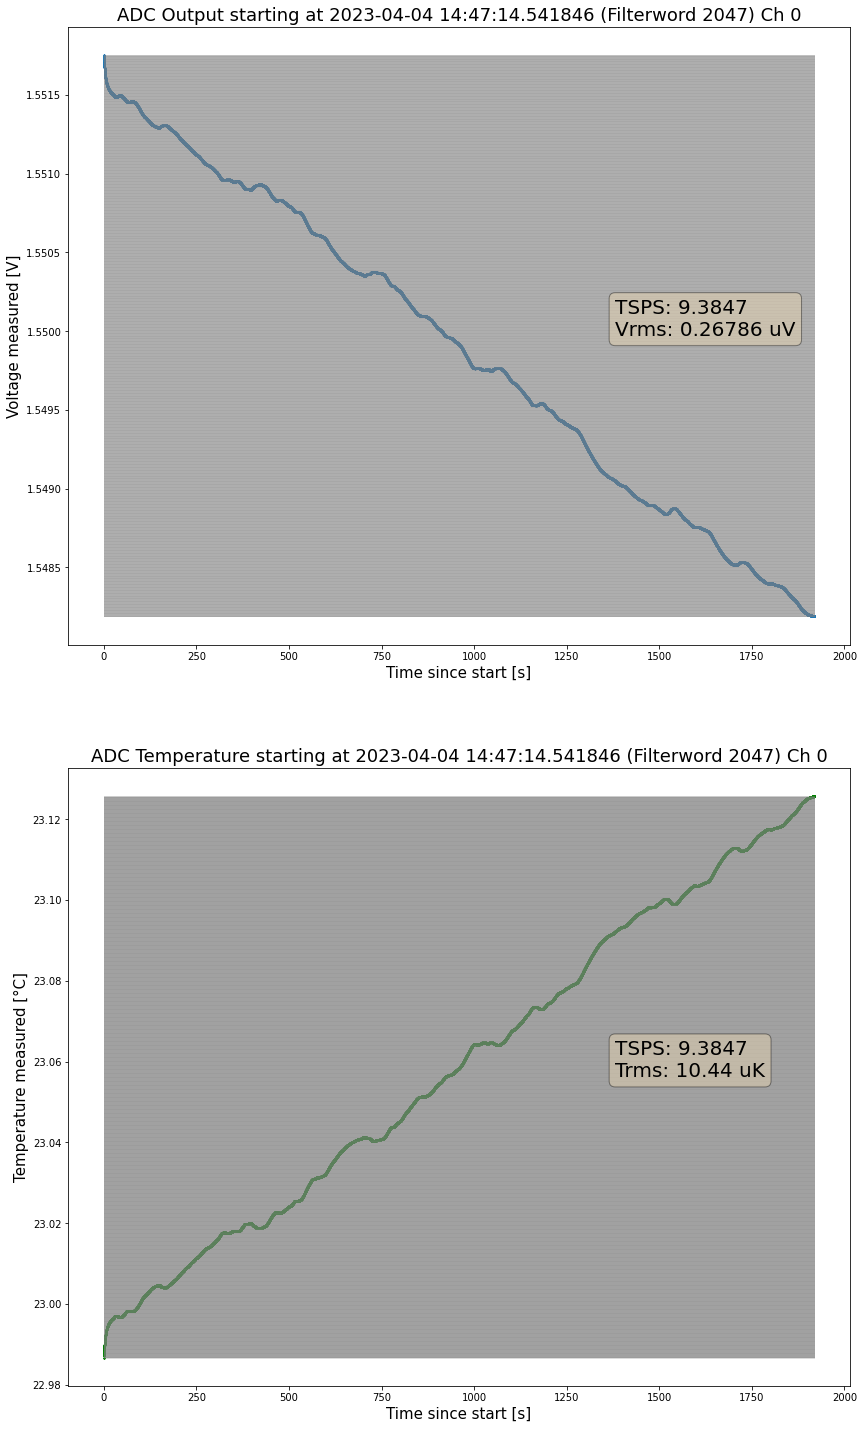

In [27]:
analyze(2047,10,0,"_v2")

Loading multidata_adc_filter2047_v2.txt
Loaded 18000 Datapoints
TSPS: 9.396582818587502
V RMS: 7.274128429379223e-07 V
T RMS: 2.8327639593090314e-05 K


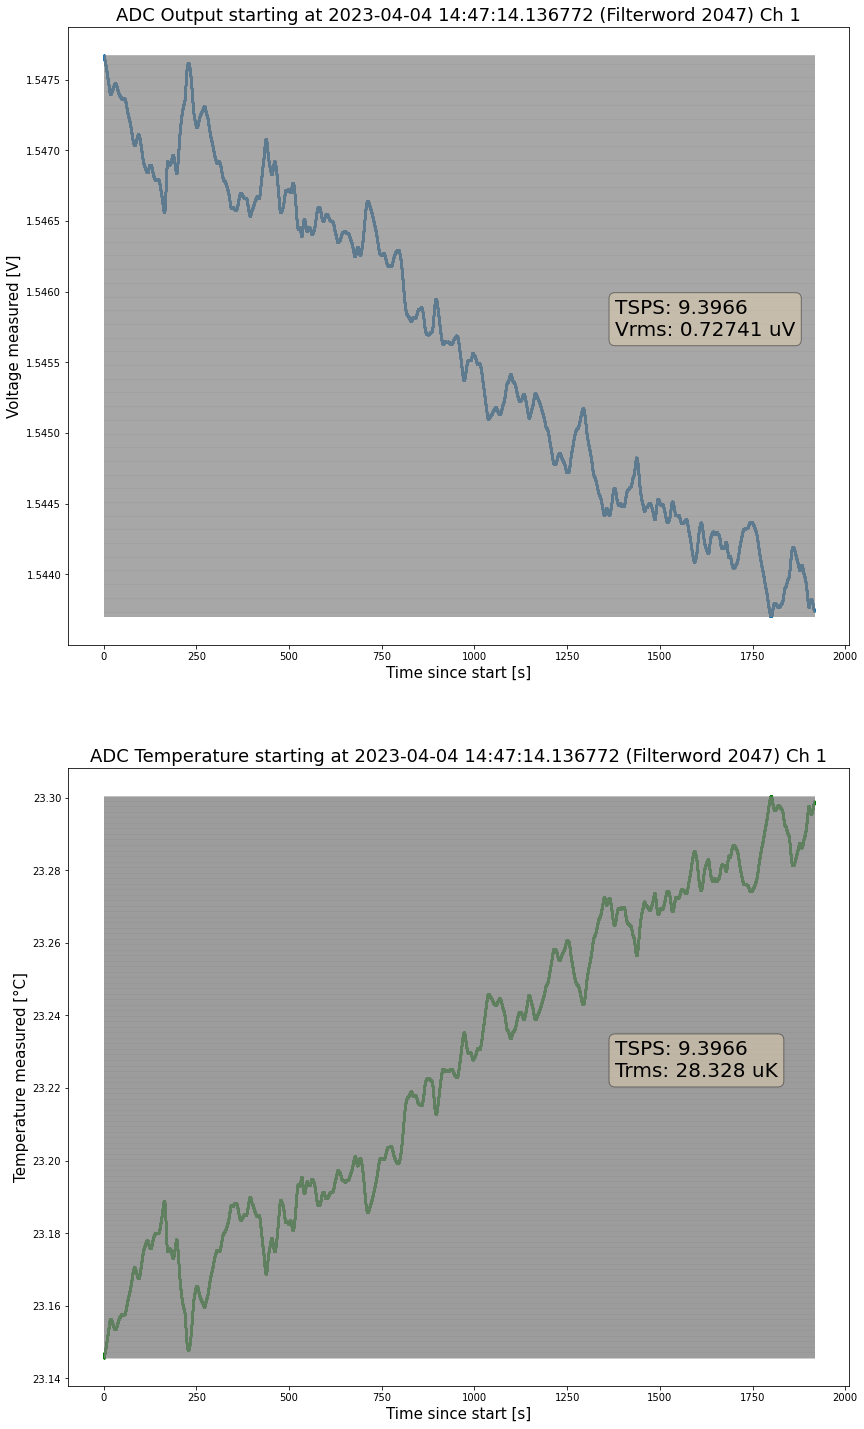

In [28]:
analyze(2047,10,1,"_v2")